In [5]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [10]:
df = pd.read_csv('ionosphere_data.csv', delimiter=',', header=None)
# Remove any rows that have a ? or Nan(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')


# Display first 10 rows to get a picture of the data
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [11]:
# Change the last column to be 0 (bad radar) or 1 (good radar)
df.iloc[:,-1] = 1*(df.iloc[:,-1] == 'g')

df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,1
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,1
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0


In [14]:
# Basic stats for each feature

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Separate data into good and bad 
positive = df.iloc[:,-1] == 1
pos_data = df[positive]
negative = df.iloc[:,-1] == 0
neg_data = df[negative]

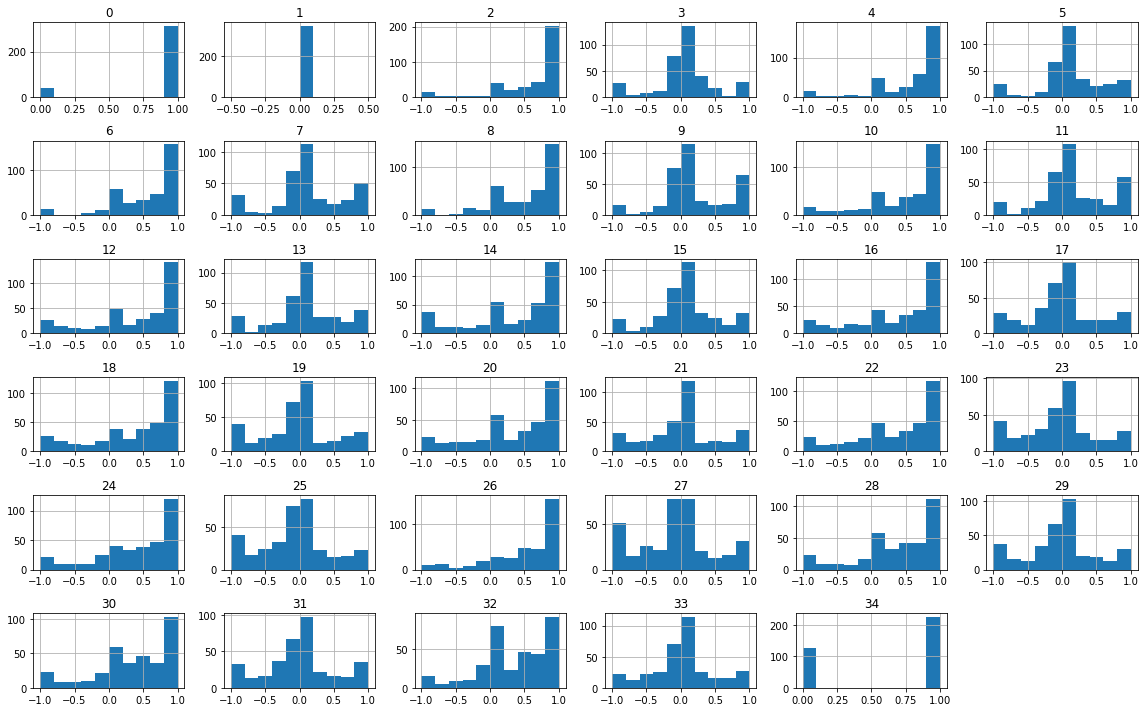

In [17]:
# Plot distributions for each feature

df.hist(figsize=(16,10));
plt.tight_layout()

In [ ]:
# Compute the correlation matrix
corr = df.corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr, annot=True, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=0.5, linecolor="white")

In [18]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df.copy()
train_set = data_copy.sample(frac=0.50, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = float)
y_train = np.array(train_set.iloc[:, -1], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = float)
y_test = np.array(test_set.iloc[:, -1], dtype = int)


print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

print(y_train)

x_train size:  (176, 34)
y_train size:  (176,)
x_test size:  (175, 34)
y_test size:  (175,)
[1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1]


In [20]:
# Split Data between Training and Test Data (70/30 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df.copy()
train_set = data_copy.sample(frac=0.50, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = float)
y_train = np.array(train_set.iloc[:, -1], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = float)
y_test = np.array(test_set.iloc[:, -1], dtype = int)


print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

print(y_train)

x_train size:  (176, 34)
y_train size:  (176,)
x_test size:  (175, 34)
y_test size:  (175,)
[1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1]


In [23]:
class LogisticRegression:

    def __init__(self, intercept = True): 
        #self.num_steps = num_steps
        #self.leaning_rate = learning_rate
        #self.error_rate = error_rate
        self.intercept = intercept

    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis = 1)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
                  
                  
    def cost_function(self, X, y, w): #Cross Entropy Loss Function
        N,D = X.shape
        z = np.dot(X, w)
        
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
        grad = np.dot(X.T,(self.sigmoid(z) - y)) / N
        
        return grad, J
    
                  
    def gradient_descent(self, X, y, num_steps, learning_rate, min_error):
        # Min error is just the early termination requirement (Set up as Small change is objective right now)
        N,D = X.shape
        w = np.zeros(D)
        grad, J_previous = self.cost_function(X, y, w)
        
        for i in range(num_steps):
                grad, J = self.cost_function(X, y, w)
                w = w - (learning_rate * grad)
                
                if np.linalg.norm(grad) < min_error:
                #if np.abs(J - J_previous) < min_error: # Need to determine the best way to determine the early stopping point
                    break
                else:
                    J_previous = J
                  
        print("Number of Iterations = " + str(i))
        print("Minimum Cost (J) = " + str(J))          
        return w, J

    
    def fit(self, X, y, num_steps, learning_rate, min_error): #Logistic regression and Gradient Descent (Input is X and y, outputs weights of model)
        if self.intercept == True:
            X = self.add_intercept(X)
            
        
        #Gradient function
        w, J = self.gradient_descent(X, y, num_steps, learning_rate, min_error)
        
        print("Weights of Model: ", w)
        return w
    
    def predict(self, X, w): #Ouput is the predicted values for y
        if self.intercept == True:
            X = self.add_intercept(X)
        
        y_pred = self.sigmoid(np.dot(X, w))
        y_pred = y_pred.round() #Rounds the value to 1 or 0
        
        #print("y_pred Shape")
        #print(y_pred.shape)
        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        RN = TN + FN
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        try:  
            precision = (TP / (RP))*100
        except:
            print('Error: Divide by Zero')
            precision = np.nan
        try:
            recall = (TP / (P))*100
        except:
            print('Error: Divide by Zero')
            recall = np.nan

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A  

In [ ]:
# Implement a K-Fold Validation for Logistic Regression
# Split the training set into K folds and determine the average accuracy

def cross_validation_LR(model, x_train, y_train, K, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        w = model.fit(x_training, y_training, num_steps, learning_rate, min_error)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val, w)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy


In [25]:
Model_Logistic_Regression = LogisticRegression(intercept = True)

In [27]:
cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.001, min_error = 1e-2, random_shuffle = False)

NameError: name 'cross_validation_LR' is not defined